# 安装依赖关系 Install Dependencies

In [287]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /Users/hqyang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hqyang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hqyang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/hqyang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# 大小写转换 Case Conversion
https://www.iamwawa.cn/daxiaoxie.html

In [288]:
text = '''
        Natural Language Processing (NLP) is a fascinating field!
        It involves teaching machines to understand human language.   
        Let's learn the course, 1B00383, together!
        ''' 
# text = text.strip()  # 去除首尾空白字符 Strip leading and trailing whitespace characters

In [289]:
print(f'original: {text}')
print(f'lower: {text.lower()}')
print(f'upper: {text.upper()}')
print(f'title: {text.title()}')
print(f'capitalize: {text.capitalize()}') 
# 首字母大写 Capitalize the first letter of the string
# 因为首字母可能是换行符和空格，而非字母，导致 capitalize() 的行为与 lower() 部分重合
print(f'swapcase: {text.swapcase()}')   

original: 
        Natural Language Processing (NLP) is a fascinating field!
        It involves teaching machines to understand human language.   
        Let's learn the course, 1B00383, together!
        
lower: 
        natural language processing (nlp) is a fascinating field!
        it involves teaching machines to understand human language.   
        let's learn the course, 1b00383, together!
        
upper: 
        NATURAL LANGUAGE PROCESSING (NLP) IS A FASCINATING FIELD!
        IT INVOLVES TEACHING MACHINES TO UNDERSTAND HUMAN LANGUAGE.   
        LET'S LEARN THE COURSE, 1B00383, TOGETHER!
        
title: 
        Natural Language Processing (Nlp) Is A Fascinating Field!
        It Involves Teaching Machines To Understand Human Language.   
        Let'S Learn The Course, 1B00383, Together!
        
capitalize: 
        natural language processing (nlp) is a fascinating field!
        it involves teaching machines to understand human language.   
        let's learn the cou

# 词语切词 Tokenization

In [290]:
sent_tokens = nltk.sent_tokenize(text)
print(f'sent_tokens:\n {sent_tokens}')

word_text = nltk.word_tokenize(text)
print(f'word_text:\n {word_text}')

print(f'split:\n {text.split()}')


sent_tokens:
 ['\n        Natural Language Processing (NLP) is a fascinating field!', 'It involves teaching machines to understand human language.', "Let's learn the course, 1B00383, together!"]
word_text:
 ['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'fascinating', 'field', '!', 'It', 'involves', 'teaching', 'machines', 'to', 'understand', 'human', 'language', '.', 'Let', "'s", 'learn', 'the', 'course', ',', '1B00383', ',', 'together', '!']
split:
 ['Natural', 'Language', 'Processing', '(NLP)', 'is', 'a', 'fascinating', 'field!', 'It', 'involves', 'teaching', 'machines', 'to', 'understand', 'human', 'language.', "Let's", 'learn', 'the', 'course,', '1B00383,', 'together!']


# 加载数据集 Load Datasets
## 例子1: Brown 语料库

In [291]:
# 第一步：下载 Brown 语料库（仅需下载一次）
nltk.download('brown')

# 第二步：加载语料库
from nltk.corpus import brown

[nltk_data] Downloading package brown to /Users/hqyang/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Brown 语料库的文体类别：
['adventure', 'belles_lettres', 'editorial', 'fiction', 'government', 'hobbies', 'humor', 'learned', 'lore', 'mystery', 'news', 'religion', 'reviews', 'romance', 'science_fiction']

新闻文体前 10 个词：
['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of']

新闻文体中最常见的 5 个词：
[('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146)]


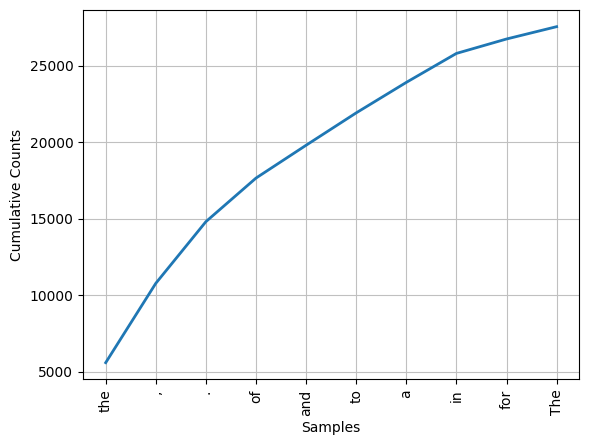

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [292]:
# 第三步：使用语料库（示例操作）
# 1. 查看语料库包含的文体类别
print("Brown 语料库的文体类别：")
print(brown.categories())  # 输出：['adventure', 'belles_lettres', 'editorial', ...]

# 2. 获取某类文体的文本（以 "news" 新闻文体为例）
news_text = brown.words(categories='news')
print("\n新闻文体前 10 个词：")
print(news_text[:10])  # 输出：['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

# 3. 统计词频
from nltk.probability import FreqDist
fdist = FreqDist(news_text)
print("\n新闻文体中最常见的 5 个词：")
print(fdist.most_common(5))  # 输出：[('the', 5580), (',', 5188), ('.', 4030), ...]

# Visualize word frequencies
fdist.plot(10, cumulative=True)

In [293]:
# 加载数据集 Load Datasets
## 例子2: Brown 语料库

In [294]:
# 第一步：下载 Penn Treebank 语料库（仅需下载一次）
# 注意：NLTK 中的 Penn Treebank 是简化版（含华尔街日报等文本）
nltk.download('treebank')

# 第二步：加载语料库
from nltk.corpus import treebank

[nltk_data] Downloading package treebank to /Users/hqyang/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [295]:
# 第三步：查看语料库基本信息
# 1. 查看包含的文件（按句子编号存储）
print("语料库文件数量：", len(treebank.fileids()))  # 输出：199 个文件
print("前 5 个文件：", treebank.fileids()[:5])  # 如 ['wsj_0001.mrg', 'wsj_0002.mrg', ...]

# 2. 获取句子的词性标注（以第一个文件的第一句为例）
tagged_sent = treebank.tagged_sents()[0]  # 每个句子是 (词, 词性标签) 的列表
print("\n第一句的词性标注：")
print(tagged_sent)  # 输出：[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

# 3. 获取句法结构树（短语结构树）
parse_tree = treebank.parsed_sents()[0]  # 句子的句法树对象
print("\n第一句的句法结构树：")
print(parse_tree)  # 输出树状结构（如 (S (NP (NNP Pierre) (NNP Vinken)) ... )

# 4. 可视化句法树（需安装 matplotlib 库）
parse_tree.draw()  # 弹出窗口显示树状图

语料库文件数量： 199
前 5 个文件： ['wsj_0001.mrg', 'wsj_0002.mrg', 'wsj_0003.mrg', 'wsj_0004.mrg', 'wsj_0005.mrg']

第一句的词性标注：
[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]

第一句的句法结构树：
(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


# 1. 去除HTML标签和噪音 
Removing HTML tags & noise
# 2. 删除额外的空格和换行符 
Remove extra whitespace and newlines

In [327]:
import requests

# 下载 HTML 格式的文本数据: 古腾堡计划（Project Gutenberg） 
data = requests.get('http://www.gutenberg.org/cache/epub/8001/pg8001.html')
content = data.text
print(content[950:1200]) # 显示部分内容

#pg-header #pg-machine-header p {
    text-indent: -4em;
    margin-left: 4em;
    margin-top: 1em;
    margin-bottom: 0;
    font-size: medium
}
#pg-header #pg-header-authlist {
    all: initial;
    margin-top: 0;
    margin-bottom: 0;
}


In [ ]:
import re
from bs4 import BeautifulSoup

def strip_html_tags(text):
    """
    移除文本中的HTML标签并提取纯文本内容，同时标准化换行符。

    功能说明：
        1. 使用BeautifulSoup解析HTML文本，移除`<iframe>`和`<script>`标签（通常包含非文本内容）
        2. 提取HTML中的纯文本内容
        3. 将各种换行符（\r、\n、\r\n）统一替换为单个\n，确保换行格式一致

    参数：
        text (str)：包含HTML标签的原始文本字符串

    返回：
        str：移除所有HTML标签后的纯文本，换行符已标准化为\n

    依赖：
        需要安装BeautifulSoup库（pip install beautifulsoup4）

    示例：
        >>> raw_html = "<p>Hello<br>World!</p><script>alert('test')</script>"
        >>> strip_html_tags(raw_html)
        'Hello\nWorld!'
    """
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

clean_content = strip_html_tags(content)
print(clean_content[953:1452])

*** START OF THE PROJECT GUTENBERG EBOOK THE BIBLE, KING JAMES VERSION, BOOK 1: GENESIS ***
This eBook was produced by David Widger
with the help of Derek Andrew's text from January 1992
and the work of Bryan Taylor in November 2002.
Book 01        Genesis
01:001:001 In the beginning God created the heaven and the earth.
01:001:002 And the earth was without form, and void; and darkness was
           upon the face of the deep. And the Spirit of God moved upon
           the face of the waters.



In [ ]:
import zipfile
from io import BytesIO

# 初始化变量，用于存储HTML内容
zh_data = None

# 下载ZIP文件: 《道德经》(老子)
url = 'https://www.gutenberg.org/cache/epub/7337/pg7337-h.zip'
try:
    response = requests.get(url, timeout=10)
    response.raise_for_status()
except requests.exceptions.RequestException as e:
    print(f"下载失败：{e}")
else:
    # 解压并读取HTML内容
    try:
        with zipfile.ZipFile(BytesIO(response.content), 'r') as zip_ref:
            file_list = zip_ref.namelist()
            html_files = [f for f in file_list if f.endswith('.html')]
            
            if html_files:
                # 读取第一个HTML文件并存储到zh_data
                with zip_ref.open(html_files[0]) as html_file:
                    zh_data = html_file.read().decode('utf-8')  # 存储完整HTML内容
                    print(f"HTML内容已成功存储到 zh_data，文件名为：{html_files[0]}")
                    print(f"内容长度：{len(zh_data)} 字符")
            else:
                print("ZIP中未找到HTML文件，zh_data保持为None")
    except zipfile.BadZipFile:
        print("无效的ZIP文件，zh_data保持为None")
    except Exception as e:
        print(f"处理文件出错：{e}，zh_data保持为None")

# 第二种读法
data = requests.get('http://www.gutenberg.org/cache/epub/8001/pg8001.html')
content = data.text
print(content[950:1200]) # 显示部分内容

HTML内容已成功存储到 Chi_data，文件名为：pg7337-images.html
内容长度：38766 字符


In [ ]:
# 后续可直接使用 zh_data 变量（例如打印前1000字符）
if zh_data is not None:
    print("\nzh_data 内容预览：")
    print(zh_data[7500:7800])


Chi_data 内容预览：
BOOK 道德經 ***</span>
</div></section><p id="id00000">Produced by Ching-yi Chen</p>

<p id="id00001" style="margin-top: 12em">老子《道德經》 第一~四十章</p>

<p id="id00002">老子道經</p>

<p id="id00003">第一章</p>

<p id="id00004">道可道，非常道。名可名，非常名。無，名天地之始﹔有，名萬物之母。
故常無，欲以觀其妙；常有，欲以觀其徼。此兩者，同出而異名，同謂之
玄。玄之又玄，眾妙之門。


In [ ]:
clean_chi_content = strip_html_tags(zh_data)
print(clean_chi_content[524:999])

Title: 道德經
Author: Laozi
Release date: January 1, 2005 [eBook #7337]
                Most recently updated: December 30, 2020
Language: Chinese
Credits: Produced by Ching-yi Chen
*** START OF THE PROJECT GUTENBERG EBOOK 道德經 ***
Produced by Ching-yi Chen
老子《道德經》 第一~四十章
老子道經
第一章
道可道，非常道。名可名，非常名。無，名天地之始﹔有，名萬物之母。
故常無，欲以觀其妙；常有，欲以觀其徼。此兩者，同出而異名，同謂之
玄。玄之又玄，眾妙之門。
第二章
天下皆知美之為美，斯惡矣﹔皆知善之為善，斯不善矣。故有無相生，難
易相成，長短相形，高下相傾，音聲相和，前後相隨。是以聖人處「無為
」之事，行「不言」之教。萬物作焉而不辭，生而不有，為而不恃，功成
而弗居。夫唯弗居，是以不去。



# 3. 删除特殊字符(重读) Removing Accented Characters
Accented Characters (Non-ASCII)
- The unicodedata module handles unicode characters very efficiently. Please check unicodedata dcoumentation for more details.
- When dealing with the English data, we may often encounter foreign characters in texts that are not part of the ASCII character set.

In [ ]:
import unicodedata

## Function: remove accented chars

def remove_accented_chars(text):
    """
    移除文本中的重音字符（如é、ñ、ü等），将其转换为无重音的基础字符。
    
    处理逻辑：
        1. 使用`unicodedata.normalize('NFKD', text)`对文本进行Unicode规范化：
           - NFKD（Compatibility Decomposition, Canonical Composition）会将重音字符分解为
             基础字符 + 重音符号（例如：'é' 分解为 'e' + 重音符号）。
        2. 通过`.encode('ascii', 'ignore')`将规范化后的文本编码为ASCII：
           - ASCII编码不支持重音符号，`ignore`参数会忽略无法编码的重音符号部分，仅保留基础字符。
        3. 再通过`.decode('utf-8', 'ignore')`将字节流解码回UTF-8字符串，得到无重音的结果。
    
    参数：
        text (str)：包含重音字符的原始文本
    
    返回：
        str：移除重音后的文本（仅包含ASCII可表示的字符）
    
    示例：
        >>> remove_accented_chars("café cliché naïve")
        'cafe cliche naive'
        >>> remove_accented_chars("àèìòù ÁÉÍÓÚ ñ ç")
        'aeiou AEIOU n c'
    """
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text


In [302]:
s = 'Sómě Áccěntěd těxt'
print(f'Original: {s}')   
print(f'Accented_processed: {remove_accented_chars(s)}')

Original: Sómě Áccěntěd těxt
Accented_processed: Some Accented text


## 中文处理
- “简体”
- “繁体”
- “臺灣正體”
- “香港繁體”
- 简繁分歧词
- 一简对多繁
- 一繁对多简




In [303]:
!pip install opencc-python-reimplemented

In [304]:
from opencc import OpenCC

# 初始化转换器：
# 't2s' 表示繁体转简体（traditional to simplified）
# 's2t' 表示简体转繁体（simplified to traditional）
cc = OpenCC('t2s')  # 繁体转简体

traditional_text = "中華人民共和國，臺灣是中國的一部分。"
print("原始繁体文本：", traditional_text)

# 繁转简
simplified_text = cc.convert(traditional_text)
print("转换后简体文本：", simplified_text)  # 输出："中华人民共和国，台湾是中国的一部分。"


cc_s2t = OpenCC('s2t')
traditional_text2 = cc_s2t.convert("我爱中国，我爱北京天安门。")
print("简体转繁体：", traditional_text2)  # 输出："我愛中國，我愛北京天安門。"

原始繁体文本： 中華人民共和國，臺灣是中國的一部分。
转换后简体文本： 中华人民共和国，台湾是中国的一部分。
简体转繁体： 我愛中國，我愛北京天安門。


# 4. 删除特殊字符，数字和符号 
Removing Special Characters, Numbers and Symbols

In [331]:
import re

def remove_special_characters(text, lang='en', remove_digits=False):
    """
    移除文本中的特殊字符（如标点符号、符号等），可选择是否保留数字。
    
    处理逻辑：
        1. 根据`remove_digits`参数构建正则匹配模式:
           - 当`remove_digits=False`（默认）:
             - lang='en': 保留字母(a-zA-Z)、数字(0-9)和空格(\s)，移除其他不相关字符。
             - lang='zh': 保留中文(\u4e00-\u9fa5)、数字(0-9)和空格(\s)，移除其他不相关字符。
           - 当`remove_digits=True`:
             - lang='en': 保留字母(a-zA-Z)、数字(0-9)和空格(\s)，移除其他不相关字符。
             - lang='zh': 保留中文(\u4e00-\u9fa5)、数字(0-9)和空格(\s)，移除其他不相关字符。
        2. 使用`re.sub`将匹配到的特殊字符替换为空字符串，实现移除效果。
        3. 额外处理：移除多余的换行符和空白字符，确保文本整洁。
    
    参数：
        text (str)：待处理的原始文本。
        remove_digits (bool)：是否移除数字，默认False（保留数字）。
        remove_special_characters (bool): 是否移除特殊字符，默认False（保留特殊字符）
    
    返回：
        str：移除特殊字符后的文本（仅保留指定允许的字符）。
    
    示例：
        >>> remove_special_characters("Hello, 世界! 123 🙂🙂🙂", lang='en')
        'Hello  123'
        
        >>> remove_special_characters("Hello, 世界! 123 🙂🙂🙂", lang='zh')
        '世界 123'
        
        >>> remove_special_characters("Hello, 世界! 123 🙂🙂🙂", lang='en', remove_digits=True)
        'Hello '
        
        >>> remove_special_characters("Hello, 世界! 123 🙂🙂🙂", lang='zh', remove_digits=True)
        '世界'    
    """
    if not text:
        return ""
    
    # 构建正则模式
    if lang == 'en':
        if remove_digits:
            # 英文模式：保留字母和空格，移除数字
            pattern = r'[^a-zA-Z\s]'
        else:
            # 英文模式：保留字母、数字和空格
            pattern = r'[^a-zA-Z0-9\s]'
    elif lang == 'zh':
        if remove_digits:
            # 中文模式：保留中文字符和空格，移除数字
            pattern = r'[^\u4e00-\u9fa5\s]'
        else:
            # 中文模式：保留中文、数字和空格
            pattern = r'[^\u4e00-\u9fa50-9\s]'
    else:
        raise ValueError("不支持的语言类型，仅支持 'en' 或 'zh'")
    
    # 移除特殊字符
    text = re.sub(pattern, '', text)

    # 匹配其中包含的任意一个字符。具体包含的字符是：{、.、(、-、)、!、}    
    special_char_pattern = re.compile(r'([{.(-)!}])')
    
    # 将匹配到的字符替换为 空格 + 捕获到的字符 + 空格
    # insert spaces between special characters to isolate them
    text = special_char_pattern.sub(" \\1 ", text)

    # remove extra newlines
    text = re.sub(r'[\r|\n|\r\n]+', ' ', text)

    # remove extra whitespace
    text = re.sub(' +', ' ', text)

    return text

In [332]:
s = "Well this was fun! See you at 7:30, What do you think!!? #$@@9318@ 🙂🙂🙂"
print(f'Original:\n\t {s}')
print(f'Special_char_processed:\n\t {remove_special_characters(s)}')
print(f'Special_char_and_digit_processed:\n\t {remove_special_characters(s, remove_digits=True)}')

s2 = "Hello, 世界! 123 🙂🙂🙂"
print(f'Original:\n\t {s2}')
print(f'Special_char_processed (en):\n\t {remove_special_characters(s2, lang="en")}')
print(f'Special_char_processed (zh):\n\t {remove_special_characters(s2, lang="zh")}')
print(f'Special_char_and_digit_processed (en):\n\t {remove_special_characters(s2, lang="en", remove_digits=True)}')
print(f'Special_char_and_digit_processed (zh):\n\t {remove_special_characters(s2, lang="zh", remove_digits=True)}')  

Original:
	 Well this was fun! See you at 7:30, What do you think!!? #$@@9318@ 🙂🙂🙂
Special_char_processed:
	 Well this was fun See you at 730 What do you think 9318 
Special_char_and_digit_processed:
	 Well this was fun See you at What do you think 
Original:
	 Hello, 世界! 123 🙂🙂🙂
Special_char_processed (en):
	 Hello 123 
Special_char_processed (zh):
	  世界 123 
Special_char_and_digit_processed (en):
	 Hello 
Special_char_and_digit_processed (zh):
	  世界 


## Expanding Contractions

In [307]:
!pip install contractions
!pip install textsearch

In [308]:
import contractions

list(contractions.contractions_dict.items())[:10]

[("I'm", 'I am'),
 ("I'm'a", 'I am about to'),
 ("I'm'o", 'I am going to'),
 ("I've", 'I have'),
 ("I'll", 'I will'),
 ("I'll've", 'I will have'),
 ("I'd", 'I would'),
 ("I'd've", 'I would have'),
 ('Whatcha', 'What are you'),
 ("amn't", 'am not')]

In [309]:
s = "Y'all can't expand contractions I'd think! You wouldn't be able to. How'd you do it?"

print("Original:", s)
print("Expanded:", contractions.fix(s))

Original: Y'all can't expand contractions I'd think! You wouldn't be able to. How'd you do it?
Expanded: You all cannot expand contractions I would think! You would not be able to. How did you do it?


# 5. 词干提取 或 词形还原
Stemming or Lemmatization

In [310]:
# Porter Stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

print('Ex1:')
s = 'jumping jumps jumped'
print(f' Original: {s}')
print(f' Stemmed: {[ps.stem(word) for word in s.split()]}')

print('Ex2:')
s = "lying"
print(f' Original: {s}')
print(f' Stemmed: {ps.stem(s)}')

print('Ex3:')
s = "strange"
print(f' Original: {s}')
print(f' Stemmed: {ps.stem(s)}')

print('Ex4:')
s = "Interesting"
print(f' Original: {s}')
print(f' Stemmed: {ps.stem(s)}')

print('Ex5:')
s = "Interestingly"
print(f' Original: {s}')
print(f' Stemmed: {ps.stem(s)}')

Ex1:
 Original: jumping jumps jumped
 Stemmed: ['jump', 'jump', 'jump']
Ex2:
 Original: lying
 Stemmed: lie
Ex3:
 Original: strange
 Stemmed: strang
Ex4:
 Original: Interesting
 Stemmed: interest
Ex5:
 Original: Interestingly
 Stemmed: interestingli


In [311]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

help(wnl.lemmatize)

Help on method lemmatize in module nltk.stem.wordnet:

lemmatize(word: str, pos: str = 'n') -> str method of nltk.stem.wordnet.WordNetLemmatizer instance
    Lemmatize `word` using WordNet's built-in morphy function.
    Returns the input word unchanged if it cannot be found in WordNet.
    
    :param word: The input word to lemmatize.
    :type word: str
    :param pos: The Part Of Speech tag. Valid options are `"n"` for nouns,
        `"v"` for verbs, `"a"` for adjectives, `"r"` for adverbs and `"s"`
        for satellite adjectives.
    :param pos: str
    :return: The lemma of `word`, for the given `pos`.



In [312]:
# lemmatize nouns
print(wnl.lemmatize('cars', 'n'))
print(wnl.lemmatize('boxes', 'n'))

car
box


In [313]:
# lemmatize verbs
print(wnl.lemmatize('running', 'v'))
print(wnl.lemmatize('ate', 'v'))

run
eat


In [314]:
# lemmatize adjectives
print(wnl.lemmatize('saddest', 'a'))
print(wnl.lemmatize('fancier', 'a'))

sad
fancy


In [315]:
# ineffective lemmatization
print(wnl.lemmatize('ate', 'n'))
print(wnl.lemmatize('fancier', 'v'))
print(wnl.lemmatize('fancier'))

ate
fancier
fancier


In [316]:
s = 'The brown foxes are quick and they are jumping over the sleeping lazy dogs!'

In [317]:
tokens = nltk.word_tokenize(s)

print(f'Original:\n {tokens}')
print(f'L_d:\n {[wnl.lemmatize(t) for t in tokens]}')  # 默认词性为名词
print(f"L_n:\n {[wnl.lemmatize(t, 'n') for t in tokens]}")  # 名词
print(f"L_v:\n {[wnl.lemmatize(t, 'v') for t in tokens]}")  # 动词
print(f"L_a:\n {[wnl.lemmatize(t, 'a') for t in tokens]}")  # 形容词
print(f"L_r:\n {[wnl.lemmatize(t, 'r') for t in tokens]}")  # 副词

Original:
 ['The', 'brown', 'foxes', 'are', 'quick', 'and', 'they', 'are', 'jumping', 'over', 'the', 'sleeping', 'lazy', 'dogs', '!']
L_d:
 ['The', 'brown', 'fox', 'are', 'quick', 'and', 'they', 'are', 'jumping', 'over', 'the', 'sleeping', 'lazy', 'dog', '!']
L_n:
 ['The', 'brown', 'fox', 'are', 'quick', 'and', 'they', 'are', 'jumping', 'over', 'the', 'sleeping', 'lazy', 'dog', '!']
L_v:
 ['The', 'brown', 'fox', 'be', 'quick', 'and', 'they', 'be', 'jump', 'over', 'the', 'sleep', 'lazy', 'dog', '!']
L_a:
 ['The', 'brown', 'foxes', 'are', 'quick', 'and', 'they', 'are', 'jumping', 'over', 'the', 'sleeping', 'lazy', 'dogs', '!']
L_r:
 ['The', 'brown', 'foxes', 'are', 'quick', 'and', 'they', 'are', 'jumping', 'over', 'the', 'sleeping', 'lazy', 'dogs', '!']


In [318]:
# 词性标注 Part-of-Speech (POS) Tagging
tagged_tokens = nltk.pos_tag(tokens)
print(tagged_tokens)

[('The', 'DT'), ('brown', 'JJ'), ('foxes', 'NNS'), ('are', 'VBP'), ('quick', 'JJ'), ('and', 'CC'), ('they', 'PRP'), ('are', 'VBP'), ('jumping', 'VBG'), ('over', 'IN'), ('the', 'DT'), ('sleeping', 'VBG'), ('lazy', 'JJ'), ('dogs', 'NNS'), ('!', '.')]


In [ ]:
# Tag conversion to WordNet Tags
from nltk.corpus import wordnet

def pos_tag_wordnet(tagged_tokens):
    """
    将NLTK词性标注结果转换为WordNet词形还原器（Lemmatizer）兼容的词性标签。
    
    背景：
        NLTK的`pos_tag`函数返回的词性标签遵循Penn Treebank格式（如形容词为'JJ'、动词为'VB'等），
        而WordNet的`lemmatize`方法需要特定的词性标签（如形容词为`wordnet.ADJ`、动词为`wordnet.VERB`等），
        因此需要通过首字母映射实现格式转换。
    
    参数：
        tagged_tokens (list)：由`nltk.pos_tag`返回的词性标注列表，每个元素为元组`(word, tag)`，
                             其中`word`是词语，`tag`是Penn Treebank格式的词性标签（如'JJ'、'VB'）。
    
    返回：
        list：转换后的词性标注列表，每个元素为元组`(word, wordnet_tag)`，
              其中`wordnet_tag`是WordNet兼容的词性标签（如`wordnet.ADJ`、`wordnet.VERB`）。
              若标签无法匹配，默认映射为名词（`wordnet.NOUN`）。
    
    映射规则：
        - 'j'（形容词，如Penn标签'JJ'）→ `wordnet.ADJ`
        - 'v'（动词，如Penn标签'VB'）→ `wordnet.VERB`
        - 'n'（名词，如Penn标签'NN'）→ `wordnet.NOUN`
        - 'r'（副词，如Penn标签'RB'）→ `wordnet.ADV`
    
    示例：
        >>> from nltk import pos_tag, word_tokenize
        >>> tagged = pos_tag(word_tokenize("running fast"))  # [('running', 'VBG'), ('fast', 'RB')]
        >>> pos_tag_wordnet(tagged)
        [('running', wordnet.VERB), ('fast', wordnet.ADV)]
    """

    tag_map = {'j': wordnet.ADJ, 'v': wordnet.VERB, 'n': wordnet.NOUN, 'r': wordnet.ADV}
    new_tagged_tokens = [(word, tag_map.get(tag[0].lower(), wordnet.NOUN))
                            for word, tag in tagged_tokens]
    return new_tagged_tokens

In [320]:
wordnet_tokens = pos_tag_wordnet(tagged_tokens)
print(wordnet_tokens)

print(f'Original:\n {tokens}')
print(f'L_d:\n {[wnl.lemmatize(t) for t in tokens]}')  # 默认词性为名词
print(f"L_n:\n {[wnl.lemmatize(t, 'n') for t in tokens]}")  # 名词
print(f"L_v:\n {[wnl.lemmatize(t, 'v') for t in tokens]}")  # 动词
print(f"L_a:\n {[wnl.lemmatize(t, 'a') for t in tokens]}")  # 形容词
print(f"L_r:\n {[wnl.lemmatize(t, 'r') for t in tokens]}")  # 副词
print(f'Lemmatization after WordNet Tags:\n {[wnl.lemmatize(word, tag) for word, tag in wordnet_tokens]}')


[('The', 'n'), ('brown', 'a'), ('foxes', 'n'), ('are', 'v'), ('quick', 'a'), ('and', 'n'), ('they', 'n'), ('are', 'v'), ('jumping', 'v'), ('over', 'n'), ('the', 'n'), ('sleeping', 'v'), ('lazy', 'a'), ('dogs', 'n'), ('!', 'n')]
Original:
 ['The', 'brown', 'foxes', 'are', 'quick', 'and', 'they', 'are', 'jumping', 'over', 'the', 'sleeping', 'lazy', 'dogs', '!']
L_d:
 ['The', 'brown', 'fox', 'are', 'quick', 'and', 'they', 'are', 'jumping', 'over', 'the', 'sleeping', 'lazy', 'dog', '!']
L_n:
 ['The', 'brown', 'fox', 'are', 'quick', 'and', 'they', 'are', 'jumping', 'over', 'the', 'sleeping', 'lazy', 'dog', '!']
L_v:
 ['The', 'brown', 'fox', 'be', 'quick', 'and', 'they', 'be', 'jump', 'over', 'the', 'sleep', 'lazy', 'dog', '!']
L_a:
 ['The', 'brown', 'foxes', 'are', 'quick', 'and', 'they', 'are', 'jumping', 'over', 'the', 'sleeping', 'lazy', 'dogs', '!']
L_r:
 ['The', 'brown', 'foxes', 'are', 'quick', 'and', 'they', 'are', 'jumping', 'over', 'the', 'sleeping', 'lazy', 'dogs', '!']
Lemmatizat

In [ ]:
# Combine together for Lemmatization
def lemmatize_text(text):
    """
    对文本进行词形还原（Lemmatization），将词语还原为其基本形式（如动词第三人称→原形、名词复数→单数）。
    
    处理流程：
        1. 分词：将文本拆分为独立词语（使用NLTK的`word_tokenize`）。
        2. 词性标注：为每个词语添加Penn Treebank格式的词性标签（使用NLTK的`pos_tag`）。
        3. 标签转换：将词性标签转换为WordNet兼容格式（调用`pos_tag_wordnet`）。
        4. 词形还原：使用WordNet词形还原器，根据转换后的词性标签对每个词语进行还原。
        5. 拼接：将还原后的词语重新拼接为文本。
    
    参数：
        text (str)：待处理的原始文本（英文）。
    
    返回：
        str：经过词形还原后的文本，词语均为基本形式。
    
    依赖：
        - 需要加载NLTK的`punkt`分词模型和`averaged_perceptron_tagger`词性标注模型（可通过`nltk.download()`下载）。
        - 需要初始化WordNet词形还原器（如`wnl = WordNetLemmatizer()`）。
    
    示例：
        >>> wnl = WordNetLemmatizer()  # 假设已初始化
        >>> lemmatize_text("Cats are running quickly")
        'cat be run quick'
    """

    tokens = nltk.word_tokenize(text)
    tagged_tokens = nltk.pos_tag(tokens)
    wordnet_tokens = pos_tag_wordnet(tagged_tokens)
    text = ' '.join(wnl.lemmatize(word, tag) for word, tag in wordnet_tokens)
    return text

s = 'The brown foxes are quick and they are jumping over the sleeping lazy dogs!'
print(f'Original:\n {s}')
print(f'Lemmatized:\n {lemmatize_text(s)}')

Original:
 The brown foxes are quick and they are jumping over the sleeping lazy dogs!
Lemmatized:
 The brown fox be quick and they be jump over the sleep lazy dog !


# 6. 删除停止词 
Removing stop words

In [322]:
from nltk.corpus import stopwords
import jieba # 中文分词工具


In [323]:
# Get a list of stop words in English
stop_words = set(stopwords.words("english"))
print(f'Stop words in English:\n{len(stop_words)}\n{stop_words}')

# Get a list of stop words in Chinese
chi_stop_words = set(stopwords.words("chinese"))
print(f'Stop words in Chinese:\n{len(chi_stop_words)}\n{chi_stop_words}')

Stop words in English:
198
{'more', 'few', 'its', 'now', 'not', 'nor', 'further', 'what', "weren't", 'very', 'while', "they've", 'been', 'haven', 't', 'd', 'he', 'by', 'have', 'aren', 'own', "you've", 'these', 'will', 'should', "we're", 'be', 'most', 'we', 'all', 'or', "you'd", 'themselves', "won't", 'isn', 'but', 'was', "it's", 'during', 'where', 'those', 'of', 'shan', 'with', "it'd", "it'll", 'just', 'on', 'as', 'being', 'at', "we'd", 'their', "didn't", "they'll", 'weren', 'yourself', "haven't", 'there', 'her', 'am', 'an', "she'll", 'yours', 'yourselves', "aren't", 's', 'who', 'shouldn', 're', 'off', 'o', "don't", 'myself', 'why', 'do', "we'll", "they'd", 'which', 'were', "you'll", "couldn't", 'too', 'mightn', 'don', 'is', "she'd", 'it', 'they', 'doesn', 'in', 'then', 'them', "she's", 'if', 'because', 'your', 'she', 'didn', "mightn't", 'to', "that'll", "they're", "wasn't", 'the', 'when', 'down', "hasn't", 'same', 'wasn', 'needn', 'both', 'are', "i've", 'wouldn', "shan't", 'you', 'll'

In [ ]:
def remove_stopwords(text, is_lower_case=False, stopwords=None, lang='en'):
    """
    移除文本中的停用词（如英文的"the"、"is"，中文的"的"、"了"等无实际语义的高频词），支持中英文。
    
    处理流程：
        1. 加载停用词表：若未提供自定义停用词表（stopwords），则根据语言（lang）加载默认停用词表：
           - 英文：使用NLTK的英文停用词表（nltk.corpus.stopwords.words('english')）。
           - 中文：使用NLTK的中文停用词表（nltk.corpus.stopwords.words('chinese')）。
        2. 分词：根据语言选择分词工具：
           - 英文：使用NLTK的`word_tokenize`进行分词。
           - 中文：使用Jieba的`lcut`（精确模式）进行分词。
        3. 过滤停用词：根据`is_lower_case`判断是否需要将词语小写后再匹配停用词表，保留非停用词。
        4. 拼接：将过滤后的词语重新拼接为文本。
    
    参数：
        text (str)：待处理的原始文本。
        is_lower_case (bool)：文本是否已转为小写，默认False（需将词语小写后再匹配停用词）。
        stopwords (list, optional)：自定义停用词表，若为None则使用默认表。
        lang (str)：语言类型，'en'（英文）或'zh'（中文），默认'en'。
    
    返回：
        str：切词并移除停用词后用空格相连的文本。
    
    依赖：
        - 英文：需加载NLTK的`punkt`分词模型（nltk.download('punkt')）和英文停用词表（nltk.download('stopwords')）。
        - 中文：需安装Jieba（pip install jieba）和加载NLTK的中文停用词表（nltk.download('stopwords')）。
    
    示例：
        >>> # 英文示例
        >>> remove_stopwords("The quick brown fox jumps over the lazy dog", lang='en')
        'quick brown fox jumps lazy dog'
        >>> # 中文示例
        >>> remove_stopwords("这只敏捷的棕色狐狸跳过了那只懒狗", lang='zh')
        '只 敏捷 棕色 狐狸 跳过 只 懒 狗'
    """
    # 若未提供自定义停用词表，则加载对应语言的默认停用词表
    if not stopwords:
        if lang == 'en':
            stopwords = nltk.corpus.stopwords.words('english')
        elif lang == 'zh':
            stopwords = nltk.corpus.stopwords.words('chinese')
        else:
            raise ValueError("Unsupported language. Use 'en' for English or 'zh' for Chinese.")   

    if lang == 'en':
        tokens = nltk.word_tokenize(text)
    elif lang == 'zh':
        tokens = jieba.lcut(text)  # 精确模式，返回列表
    else:
        raise ValueError("Unsupported language. Use 'en' for English or 'zh' for Chinese.")

    # 过滤停用词：根据文本是否小写，决定是否将词语转为小写后匹配
    if lang == 'en':
        if is_lower_case:
            # 文本已小写，直接匹配停用词表
            filtered_tokens = [token for token in tokens if token not in stopwords]
        else:
            # 文本未小写，将词语转为小写后再匹配（避免因大小写导致漏判）
            filtered_tokens = [token for token in tokens if token.lower() not in stopwords]   
    elif lang == 'zh':
        filtered_tokens = [token for token in tokens if token not in stopwords]    

    # 将过滤后的词语拼接为文本
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [325]:
s = ("Apple's name was inspired by Steve Jobs' visit. His visit was to an apple farm while on a fruitarian diet.")
chi_s = ("苹果的名字来源于史蒂夫·乔布斯的访问。他在吃水果的时候参观了一个苹果农场。")

In [326]:
print(f'\n\nOriginal:\n {s}')
remove_stopwords_s = remove_stopwords(s, stopwords=stop_words, lang="en")
print(f'None-stop words:\n {remove_stopwords_s}')

print(f'\n\nOriginal:\n {chi_s}')
remove_stopwords_chi_s = remove_stopwords(chi_s, stopwords=chi_stop_words, lang="zh")
print(f'None-stop words:\n {remove_stopwords_chi_s}')



Original:
 Apple's name was inspired by Steve Jobs' visit. His visit was to an apple farm while on a fruitarian diet.
None-stop words:
 Apple 's name inspired Steve Jobs ' visit . visit apple farm fruitarian diet .


Original:
 苹果的名字来源于史蒂夫·乔布斯的访问。他在吃水果的时候参观了一个苹果农场。
None-stop words:
 苹果 名字 来源于 史蒂夫 · 乔布斯 访问 。 吃水果 参观 一个 苹果 农场 。


# References (Additional Resources)
- [Real Python](https://realpython.com/nltk-nlp-python/#chunking)

- [nltk.org](https://www.nltk.org/)

- [nltk book chapter 7](https://www.nltk.org/book/ch07.html#noun-phrase-chunking)
